In [52]:

from wordcloud  import WordCloud
import pandas as pd 
from textblob import TextBlob
from googletrans import Translator
import matplotlib.pyplot as plt
import seaborn as sns



In [45]:
def translateComment(strComment:str):
    translator = Translator()
    strEngComment = translator.translate(strComment, src="es", dest="en")
    return strEngComment.text

def getPolarity(strComment:str):
    strComment = translateComment(strComment)
    analysis = TextBlob(strComment)
    return analysis.sentiment.polarity

df = pd.read_csv("C:/Users/USUARIO/OneDrive/Desktop/Análisis de Datos/Módulo Técnico/Comentarios.csv")


In [46]:
df["polaridad"] = df["Comentario"].apply(getPolarity)

df.to_csv("resultados.csv", index=False)

In [47]:
df = pd.read_csv("C:/Users/USUARIO/OneDrive/Desktop/Análisis de Datos/Módulo Técnico/resultados.csv")
display(df)

,Comentario,polaridad
0,La comida fue excelente y el servicio fue exce...,0.555556
1,El ambiente era agradable y la comida estaba d...,0.261458
2,"La comida estaba bien, pero el servicio fue le...",0.200000
3,"No me gustó la comida, estaba fría y el sabor ...",-0.475000
4,El peor restaurante en el que he estado. No lo...,-1.000000
...,...,...
66,Siempre disfruto venir aquí. La comida es deli...,0.629167
67,"Buen lugar para cenar, aunque el servicio pued...",0.070833
68,"La comida está bien, pero el ambiente no es mu...",0.208974
69,No me gustó la comida y el servicio fue muy de...,-0.520000


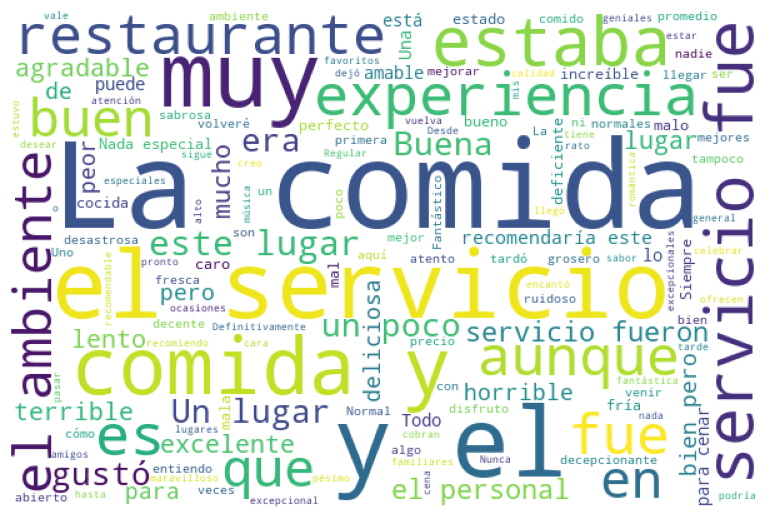

In [51]:
# Combinar todos los comentarios en una sola cadena

text="".join(review for review in df.Comentario)

# Crear la nube de palabras

wordcloud = WordCloud(width=600, height=400, background_color="white").generate(text)

# Mostrar la nube de palabras

plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()